In [1]:
!pip install livelossplot

In [4]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


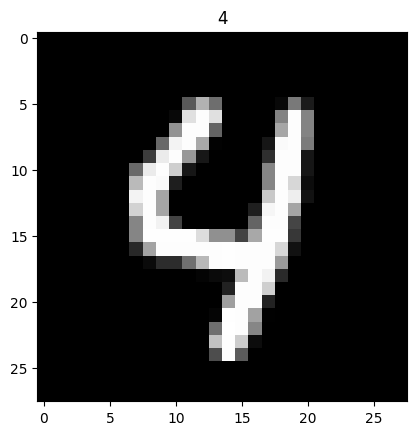

In [7]:
img_idx=564
plt.imshow(X_train[img_idx], cmap='gray')
plt.title(y_train[img_idx])
plt.show()

In [8]:
## Reshape the data
X_train_reshaped = X_train.reshape(60000, 28*28)
X_test_reshaped = X_test.reshape(10000, 28*28)

In [9]:
#Scale the data(min-max scaling)
# (xi - min) / (max - min)
X_train_reshaped=X_train_reshaped/255.0
X_test_reshaped=X_test_reshaped/255.0

In [10]:
## Builid the perceptron model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input




In [12]:
# Define the model architecture
model = Sequential()
# Input layer for 28x28 images flattened to 784
model.add(Input(shape=(28*28,), name='Input_Layer'))
# Output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(units=10, activation='softmax', name='Output_Layer'))
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Regression problem - mean squared error
# Binary classification - binary crossentropy
# Multiclass classification - sparse categorical crossentropy

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output_Layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

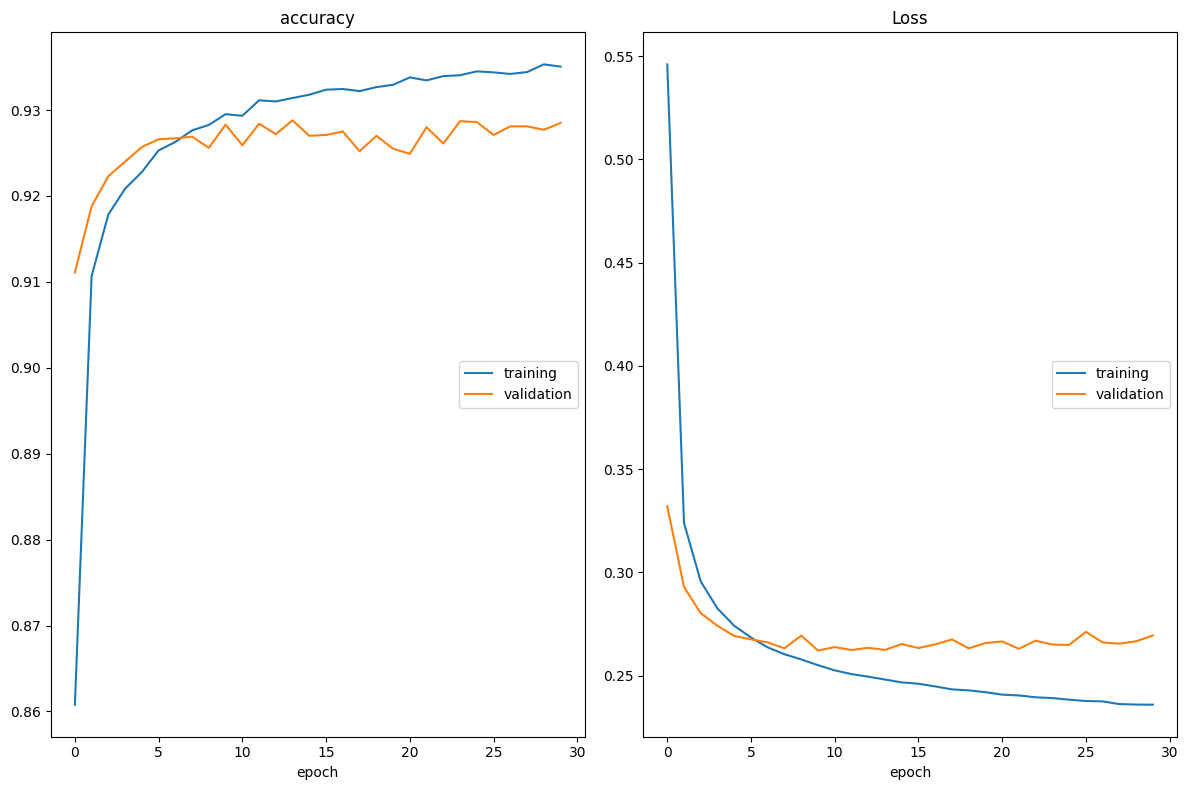

accuracy
	training         	 (min:    0.861, max:    0.935, cur:    0.935)
	validation       	 (min:    0.911, max:    0.929, cur:    0.928)
Loss
	training         	 (min:    0.236, max:    0.546, cur:    0.236)
	validation       	 (min:    0.262, max:    0.332, cur:    0.269)
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9351 - loss: 0.2359 - val_accuracy: 0.9285 - val_loss: 0.2694


In [13]:
from livelossplot import PlotLossesKeras
# Train the model with training data, 30 epochs, batch size of 64, and 20% validation split
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=64, validation_data= (X_test_reshaped,y_test), callbacks=[PlotLossesKeras()])

In [14]:
# Multilayer perceptron

model = Sequential()

# Input layer for 28x28 images flattened to 784
model.add(Input(shape=(28*28,), name='Input_Layer'))

# Hidden layer with 256 neurons and ReLU activation
model.add(Dense(units=256, activation='relu', name='Hidden_Layer_1'))
# Hidden layer with 128 neurons and ReLU activation
model.add(Dense(units=128, activation='relu', name='Hidden_Layer_2'))


# Output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(units=10, activation='softmax', name='Output_Layer'))


# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Regression problem - mean squared error
# Binary classification - binary crossentropy
# Multiclass classification - sparse categorical crossentropy

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

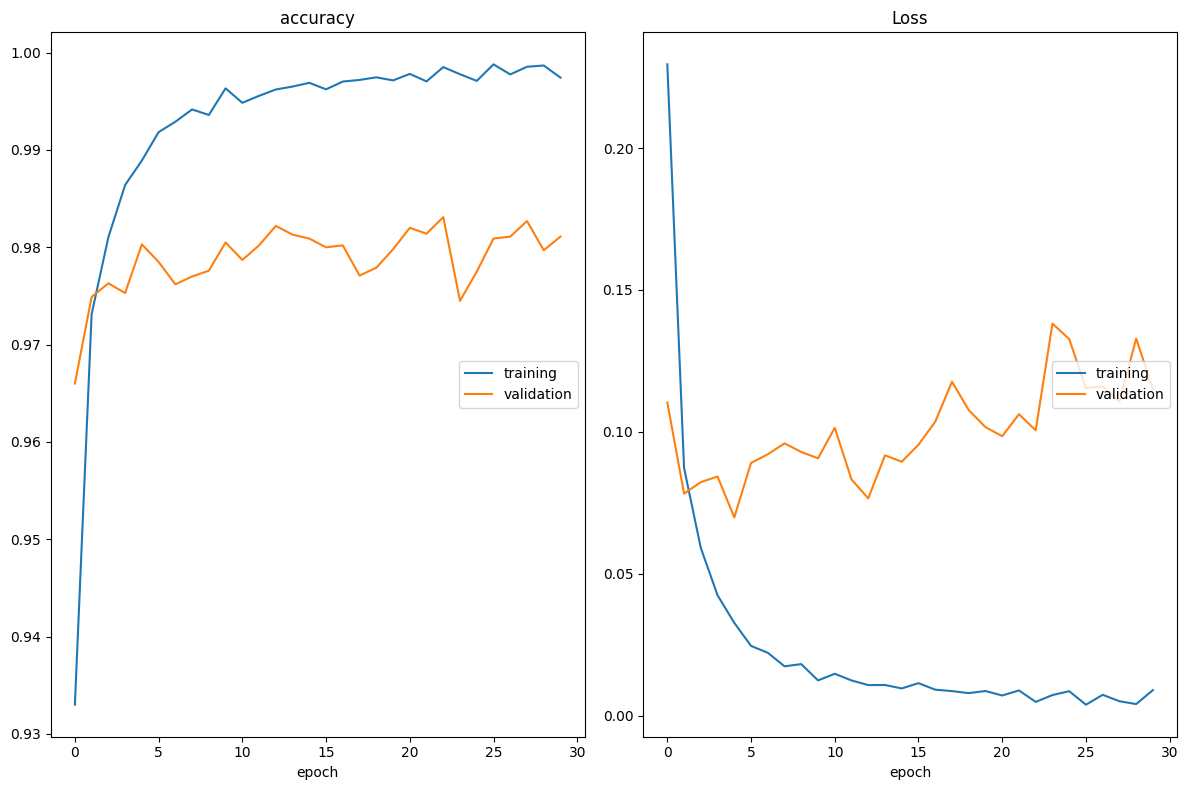

accuracy
	training         	 (min:    0.933, max:    0.999, cur:    0.997)
	validation       	 (min:    0.966, max:    0.983, cur:    0.981)
Loss
	training         	 (min:    0.004, max:    0.230, cur:    0.009)
	validation       	 (min:    0.070, max:    0.138, cur:    0.115)
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0.9811 - val_loss: 0.1150


In [15]:
#Train the model
from livelossplot import PlotLossesKeras
# Train the model with training data, 30 epochs, batch size of 64, and 20% validation split
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=64, validation_data= (X_test_reshaped,y_test), callbacks=[PlotLossesKeras()])

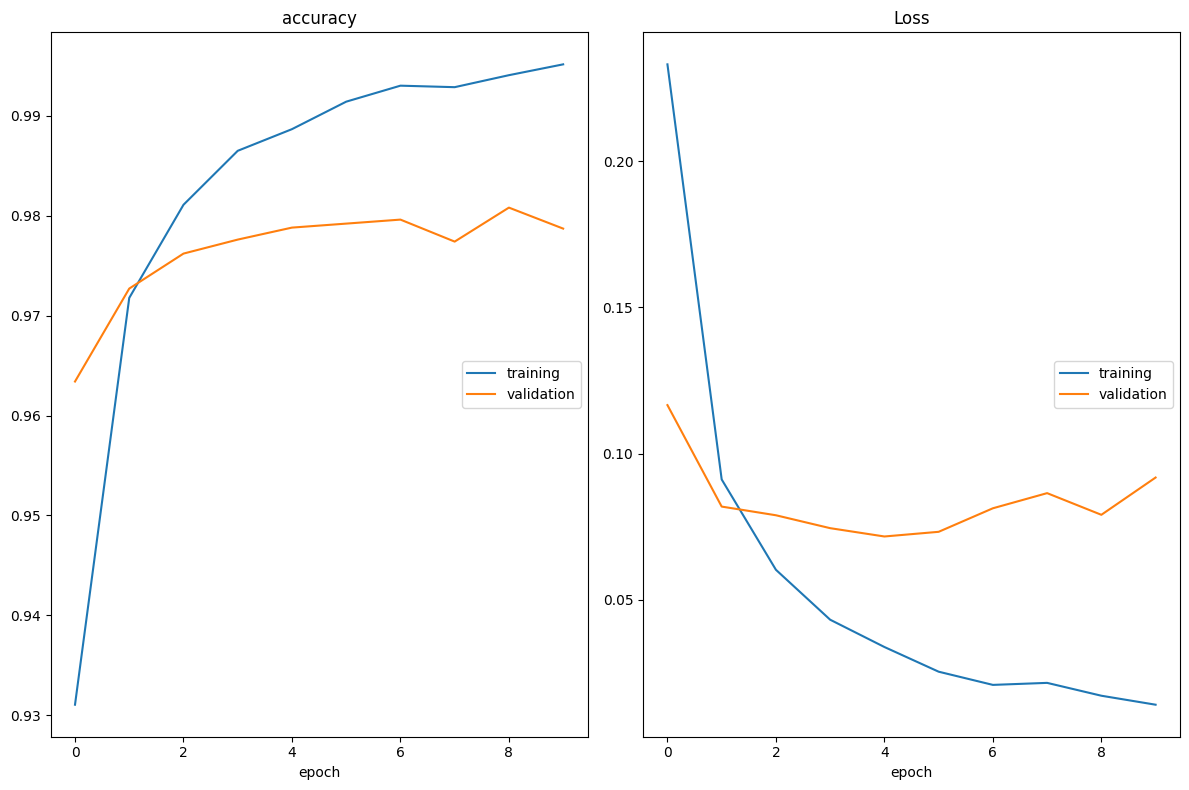

accuracy
	training         	 (min:    0.931, max:    0.995, cur:    0.995)
	validation       	 (min:    0.963, max:    0.981, cur:    0.979)
Loss
	training         	 (min:    0.014, max:    0.233, cur:    0.014)
	validation       	 (min:    0.072, max:    0.117, cur:    0.092)
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9951 - loss: 0.0142 - val_accuracy: 0.9787 - val_loss: 0.0918


In [18]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping



# Multilayer perceptron

model = Sequential()

# Input layer for 28x28 images flattened to 784
model.add(Input(shape=(28*28,), name='Input_Layer'))

# Hidden layer with 256 neurons and ReLU activation
model.add(Dense(units=256, activation='relu', name='Hidden_Layer_1'))
# Hidden layer with 128 neurons and ReLU activation
model.add(Dense(units=128, activation='relu', name='Hidden_Layer_2'))


# Output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(units=10, activation='softmax', name='Output_Layer'))


# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Regression problem - mean squared error
# Binary classification - binary crossentropy
# Multiclass classification - sparse categorical crossentropy

model.summary()



#Reset the model
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, restore_best_weights=True)

model.fit(X_train_reshaped, y_train, epochs=30, batch_size=64, validation_data= (X_test_reshaped,y_test), callbacks=[PlotLossesKeras(), early_stopping])


In [20]:
# Predict an outcome
prob=model.predict(X_test_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [21]:
# Get the label(digit)
y_test_pred = prob.argmax(axis=1)

In [22]:
# Get classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
import pandas as pd
pd.crosstab(y_test,y_test_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,0,0,2,0,0,1,1,2,0
1,0,1120,3,1,0,2,6,0,3,0
2,5,0,1009,2,1,1,5,4,5,0
3,0,0,4,990,0,9,0,1,3,3
4,0,0,3,1,966,0,9,1,0,2
5,2,0,0,8,1,873,5,0,2,1
6,6,2,0,1,3,3,943,0,0,0
7,1,5,9,4,3,0,0,993,1,12
8,2,1,3,5,2,4,4,2,947,4
